In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import cv2 as cv
from glob import glob

from sklearn.model_selection import train_test_split

from konlpy.tag import Kkma, Okt

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

from tensorflow.keras.utils import to_categorical, pad_sequences, plot_model, to_categorical
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Embedding, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

0 종이류
1 플라스틱류
2 유리병
3 캔류
4 고철류
5 스티로폼
6 도기류
7 비닐류
8 형광등
9 페트병
10 나무

In [111]:
# 각각의 리스트에 이미지파일명 담기
paper_list=glob("./_trash/*종이류*/*/*/*.jpg")
plastic_list=glob("./_trash/*플라스틱류*/*/*/*.jpg")
glass_list=glob("./_trash/*유리병*/*/*/*.jpg")
can_list=glob("./_trash/*캔류*/*/*/*.jpg")
metal_list=glob("./_trash/*고철류*/*/*/*.jpg")
styrofoam_list=glob("./_trash/*스티로폼*/*/*/*.jpg")
pottery_list=glob("./_trash/*도기류*/*/*/*.jpg")
vinyl_list=glob("./_trash/*비닐류*/*/*/*.jpg")
lamp_list=glob("./_trash/*형광등*/*/*/*.jpg")
pet_list=glob("./_trash/*페트병*/*/*/*.jpg")
tree_list=glob("./_trash/*나무*/*/*/*.jpg")

# 각 리스트의 개수
print(len(paper_list))
print(len(plastic_list))
print(len(glass_list))
print(len(can_list))
print(len(metal_list))
print(len(styrofoam_list))
print(len(pottery_list))
print(len(vinyl_list))
print(len(lamp_list))
print(len(pet_list))
print(len(tree_list))

40391
40422
42187
40086
40100
40377
40262
41220
40270
40036
41697


In [112]:
data_list=list(chain(
    paper_list,
    plastic_list,
    glass_list,
    can_list,
    metal_list,
    styrofoam_list,
    pottery_list,
    vinyl_list,
    lamp_list,
    pet_list,
    tree_list
))
print(len(data_list))

447048


In [113]:
# 데이터셋 개수 설정함수
def make_dl(n):
    paper_list_n=paper_list[:n]
    plastic_list_n=plastic_list[:n]
    glass_list_n=glass_list[:n]
    can_list_n=can_list[:n]
    metal_list_n=metal_list[:n]
    styrofoam_list_n=styrofoam_list[:n]
    pottery_list_n=pottery_list[:n]
    vinyl_list_n=vinyl_list[:n]
    lamp_list_n=lamp_list[:n]
    pet_list_n=pet_list[:n]
    tree_list_n=tree_list[:n]
    data_list_n=list(chain(
        paper_list_n, 
        plastic_list_n, 
        glass_list_n, 
        can_list_n, 
        metal_list_n, 
        styrofoam_list_n, 
        pottery_list_n, 
        vinyl_list_n, 
        lamp_list_n,
        pet_list_n,
        tree_list_n
    ))
    return data_list_n

In [114]:
# target리스트 생성함수
def make_target(data_list):
    target=[]
    for idx, val in enumerate(data_list):
        if '종이류' in val:
            target.append(0)
        elif '플라스틱' in val:
            target.append(1)
        elif '유리병' in val:
            target.append(2)
        elif '캔류' in val:
            target.append(3)
        elif '고철류' in val:
            target.append(4)
        elif '스티로폼' in val:
            target.append(5)
        elif '도기류' in val:
            target.append(6)
        elif '비닐류' in val:
            target.append(7)
        elif '형광등' in val:
            target.append(8)
        elif '페트병' in val:
            target.append(9)
        elif '나무' in val:
            target.append(10)
    return target

In [115]:
# 함수 x = scaled_data_list 
def scaling(data_list):
    X = np.zeros((len(data_list),150,150,3))
    for idx, file in enumerate(data_list):
        dt = plt.imread(file)
        dt = cv.resize(dt, (150,150)).reshape(1,150,150,-1)
        X[idx] = dt[:,:,:,:3]
    return X

In [116]:
# 정수형클래스 레이블의 한글명, 이미지를 반환
def what(image):
    img=plt.imread(image)
    dt=cv.resize(img,(150,150)).reshape(1,150,150,-1)
    dt=dt[:,:,:,:3]
    dt_trans = conv_base.predict(dt)
    argmax = np.argmax(model.predict(dt_trans))
    if argmax==0:
        print(plt.imshow(img))
        return "종이류"
    elif argmax==1:
        print(plt.imshow(img))
        return "플라스틱류", 
    elif argmax==2:
        print(plt.imshow(img))
        return "유리병"
    elif argmax==3:
        print(plt.imshow(img))
        return "캔류"
    elif argmax==4:
        print(plt.imshow(img))
        return "고철류"
    elif argmax==5:
        print(plt.imshow(img))
        return "스티로폼"
    elif argmax==6:
        print(plt.imshow(img))
        return "도기류"
    elif argmax==7:
        print(plt.imshow(img))
        return "비닐류"
    elif argmax==8:
        print(plt.imshow(img))
        return "형광등"
    elif argmax==9:
        print(plt.imshow(img))
        return "페트병"
    elif argmax==10:
        print(plt.imshow(img))
        return "나무"

In [117]:
## 실제 학습 코드

In [118]:
# n=500
# 각 분류당 n개 추출해서 data_list로 병합
data_list=make_dl(500)

# target 생성
target=make_target(data_list)

# 총 데이터셋 개수
print(len(data_list))

5500


In [119]:
# 정수형클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수
y = np.array(target)
y = to_categorical(y)

In [120]:
# data_list를 이용해 스케일링
X=scaling(data_list)

In [121]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [122]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [123]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(1100, 150, 150, 3)
(1100, 11)
(3300, 150, 150, 3)
(3300, 11)
(1100, 150, 150, 3)
(1100, 11)


In [124]:
vgg = VGG16(include_top=False, input_shape=(150,150,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [125]:
X_train_trans = vgg.predict(X_train)
X_validation_trans = vgg.predict(X_validation)

35/35 [==============================] - 24s 671ms/step


In [126]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dense(64,activation='relu'),
        BatchNormalization(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(11
              ,activation='softmax')
    ]
)

In [127]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [128]:
model.fit(
    X_train_trans,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_validation_trans, y_validation)
)

Epoch 1/20


104/104 [==============================] - 6s 22ms/step - loss: 1.5380 - accuracy: 0.5106 - val_loss: 1.2523 - val_accuracy: 0.6145
Epoch 2/20
104/104 [==============================] - 2s 21ms/step - loss: 0.7674 - accuracy: 0.7764 - val_loss: 0.9792 - val_accuracy: 0.6973
Epoch 3/20
104/104 [==============================] - 2s 21ms/step - loss: 0.4650 - accuracy: 0.8712 - val_loss: 0.9111 - val_accuracy: 0.7182
Epoch 4/20
104/104 [==============================] - 2s 20ms/step - loss: 0.2949 - accuracy: 0.9239 - val_loss: 0.8761 - val_accuracy: 0.7464
Epoch 5/20
104/104 [==============================] - 2s 20ms/step - loss: 0.2132 - accuracy: 0.9436 - val_loss: 0.9499 - val_accuracy: 0.7400
Epoch 6/20
104/104 [==============================] - 2s 20ms/step - loss: 0.1782 - accuracy: 0.9561 - val_loss: 0.9242 - val_accuracy: 0.7400
Epoch 7/20
104/104 [==============================] - 2s 20ms/step - loss: 0.1420 - accuracy: 0.9639 - val_loss: 0.9971 - val_accuracy: 0.74

1/1 [==============================] - 0s 17ms/step
AxesImage(size=(1300, 838))


'나무'

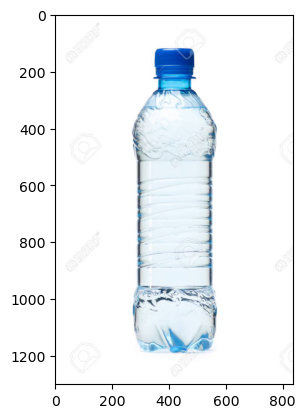

In [133]:
what('3.jpg')